In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

df = pd.read_excel('PastHires.xlsx', header = 0)
df.head()

,Years Exprienced,Employed?,Previous Er,Level Of Education,Top-Tier School,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PHD,Y,N,N


In [2]:
yes_no_map = {'Y' :1 , 'N': 0}
df['Employed?'] = df['Employed?'].map(yes_no_map)
df['Top-Tier School'] = df['Top-Tier School'].map(yes_no_map)
df['Interned'] = df['Interned'].map(yes_no_map)
df['Hired'] = df['Hired'].map(yes_no_map)
Edu_map = {'BS':0, 'MS': 1, 'PHD': 2}
df['Level Of Education'] = df['Level Of Education'].map(Edu_map)

df.head()

,Years Exprienced,Employed?,Previous Er,Level Of Education,Top-Tier School,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [3]:
features = list(df.columns[:6])
print(features)

['Years Exprienced', 'Employed?', 'Previous Er', 'Level Of Education', 'Top-Tier School', 'Interned']


In [4]:
y = df['Hired']
x = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [5]:
from IPython.display import Image
import six
import sys
sys.modules['sklearn.externals.six'] = six
import pydot
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
dot_data = six.StringIO()
tree.export_graphviz(clf, out_file = dot_data, feature_names = features)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph[0].create_png())
#This was the teachers way but it didnt work
#but the next section actually worked!

[Text(0.7142857142857143, 0.9, 'Employed? <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.5714285714285714, 0.7, 'Interned <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.42857142857142855, 0.5, 'Previous Er <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2857142857142857, 0.3, 'Top-Tier School <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

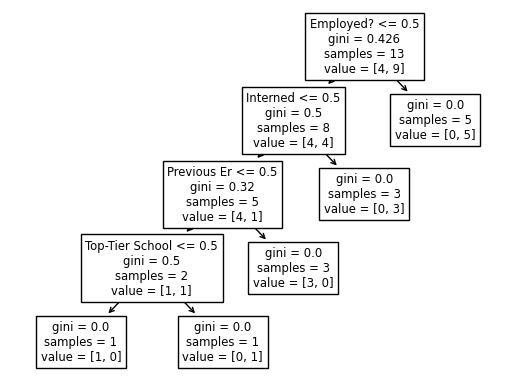

In [18]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

tree.plot_tree(clf, feature_names = features)

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x,y)
print(clf.predict([[10,1,4,0,0,0],[15,1,1,0,0,1],[7,0,6,0,0,0]]))
#this module predicts the final answer

[1 1 0]


C:\Users\AsusIran\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
